In [29]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.animation
import random

def animarNodos(G, listaAnimacion, seed=123):
    size = len(nx.degree(G))
    fig, ax =plt.subplots(figsize=(6,6))
    color_map=["green"]*size
    pos= nx.spring_layout(G, seed=seed) 
    eSize = len(G.edges())
    edge_color= ["black"]*eSize
    le = [(u,v) for u,v in G.edges()]
    
    def update(i):
        ax.clear()
        v= listaAnimacion[i]
        if(len(v)==1):
            color_map[v[0]]="red"
        else:
            edge_color[le.index((v[0],v[1]))]="red"

        nx.draw(G,node_color=color_map, with_labels=True, pos=pos, edge_color=edge_color)

    ani = matplotlib.animation.FuncAnimation(fig, update, frames = len(listaAnimacion), interval=1000)
    return ani


def createRandomGraph(size, edgeProb, seed=321):
    G = nx.Graph()
    G.add_nodes_from(list(range(size)))
    if seed:
        random.seed(seed)
    
    graph=[[False]*size for x in range(size)]
    for i in range(size):
        for j in range(i, size):
            if i == j or random.randint(0,100) > edgeProb:
                continue
            graph[i][j]=True
            graph[j][i]=True
            i1, i2 = [i,j] if i < j else [j,i]
            G.add_edge(i1,i2)
    return graph, G

[[False, True, True, True, True, False, False, True, False, True],
 [True, False, False, False, False, False, False, False, False, True],
 [True, False, False, True, False, False, True, False, True, True],
 [True, False, True, False, False, False, True, True, True, True],
 [True, False, False, False, False, True, False, False, False, False],
 [False, False, False, False, True, False, True, True, True, False],
 [False, False, True, True, False, True, False, False, True, False],
 [True, False, False, True, False, True, False, False, True, False],
 [False, False, True, True, False, True, True, True, False, False],
 [True, True, True, True, False, False, False, False, False, False]]

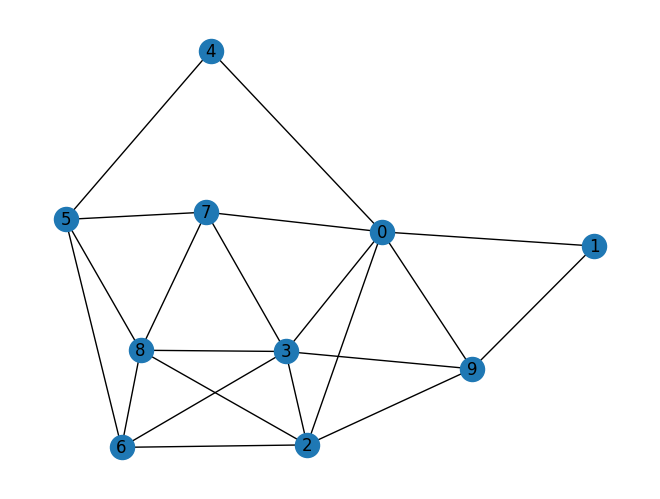

In [30]:
graph, G = createRandomGraph(10,50)
nx.draw(G, with_labels=True)
graph

In [31]:
def grado_del_grafo(graph):
    grados=[]
    colores={}
    size=len(graph)
    for i in range(0,size):
        grados.append(sum(graph[i]))
        colores[i] = ["Red","Blue","Green","Yellow", "Black", "Orange", "Brown", "Purple", "Pink", "Grey", "Cyan"]
         #TODO: add colors with import matplotlib.colors as mcolors
    return grados, colores

grados, colores =grado_del_grafo(graph)
grados


[6, 2, 5, 6, 2, 4, 4, 4, 5, 4]